Cross Validation Accuracy: 79.391% (2.882%)


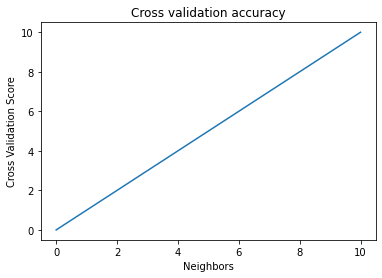

Test_accuracy0.79
Train_accuracy:0.84


array([[567, 107],
       [140, 337]])

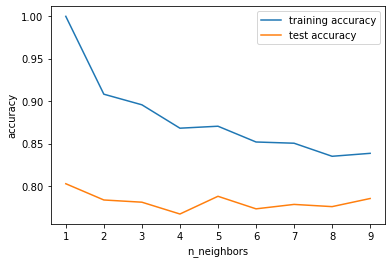

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



train_set = pd.read_csv("spam_train.csv")
test_set = pd.read_csv("spam_test.csv")

X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["class"])
training_accuracy = []
test_accuracy = []
results =[]


kfold = KFold(n_splits=5, random_state=0, shuffle=True)
for n_neighbors in neighbors_settings:
 model = KNeighborsClassifier(n_neighbors = 5)
results = cross_val_score(model, X_train,y_train, cv=kfold)
    
print("Cross Validation Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y)
plt.title("Cross validation accuracy")
plt.ylabel('Cross Validation Score')
plt.xlabel('Neighbors')
plt.show()


neighbors_settings= range(1,10)
for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors= n_neighbors)
    results = cross_val_score(model, X_train,y_train, cv=kfold)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
print("Test_accuracy{:.2f}"  .format(model.score(X_test,y_test)))
print("Train_accuracy:{:.2f}" .format(model.score(X_train,y_train)))
predictions = model.predict(X_test)
predictions

cf = confusion_matrix(y_test,model.predict(X_test))
cf
